In [38]:
import numpy as np
import matplotlib.pyplot as plt
import xarray as xr

In [39]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [40]:
# %%writefile /content/node.py
nodes = {1: [0.0, 0.0, 0.0], 2: [0.0, 0.0, 1.2], 3: [0.0, 0.0, 5.175], 4: [0.0, 0.0, 9.15], 5: [0.0, 0.0, 10.35], 6: [25.0, 0.0, 0.0], 7: [25.0, 0.0, 1.2], 8: [25.0, 0.0, 5.175], 9: [25.0, 0.0, 9.15], 10: [25.0, 0.0, 10.35], 11: [2.7778, 0.0, 0.0], 12: [2.7778, 0.0, 1.2], 13: [2.7778, 0.0, 5.175], 14: [2.7778, 0.0, 9.15], 15: [2.7778, 0.0, 10.35], 16: [5.5556, 0.0, 0.0], 17: [5.5556, 0.0, 1.2], 18: [5.5556, 0.0, 5.175], 19: [5.5556, 0.0, 9.15], 20: [5.5556, 0.0, 10.35], 21: [8.3333, 0.0, 0.0], 22: [8.3333, 0.0, 1.2], 23: [8.3333, 0.0, 5.175], 24: [8.3333, 0.0, 9.15], 25: [8.3333, 0.0, 10.35], 26: [11.1111, 0.0, 0.0], 27: [11.1111, 0.0, 1.2], 28: [11.1111, 0.0, 5.175], 29: [11.1111, 0.0, 9.15], 30: [11.1111, 0.0, 10.35], 31: [13.8889, 0.0, 0.0], 32: [13.8889, 0.0, 1.2], 33: [13.8889, 0.0, 5.175], 34: [13.8889, 0.0, 9.15], 35: [13.8889, 0.0, 10.35], 36: [16.6667, 0.0, 0.0], 37: [16.6667, 0.0, 1.2], 38: [16.6667, 0.0, 5.175], 39: [16.6667, 0.0, 9.15], 40: [16.6667, 0.0, 10.35], 41: [19.4444, 0.0, 0.0], 42: [19.4444, 0.0, 1.2], 43: [19.4444, 0.0, 5.175], 44: [19.4444, 0.0, 9.15], 45: [19.4444, 0.0, 10.35], 46: [22.2222, 0.0, 0.0], 47: [22.2222, 0.0, 1.2], 48: [22.2222, 0.0, 5.175], 49: [22.2222, 0.0, 9.15], 50: [22.2222, 0.0, 10.35], 51: [25.0, 0.0, 0.0], 52: [25.0, 0.0, 1.2], 53: [25.0, 0.0, 5.175], 54: [25.0, 0.0, 9.15], 55: [25.0, 0.0, 10.35]} # Added the full dictionary content here as inferred from context.

In [41]:
# %%writefile /content/element.py
members = {15: [3, 13], 24: [13, 18], 33: [18, 23], 42: [23, 28], 51: [28, 33], 60: [33, 38], 69: [38, 43], 78: [43, 48], 83: [48, 8], 14: [2, 12], 23: [12, 17], 32: [17, 22], 41: [22, 27], 50: [27, 32], 59: [32, 37], 68: [37, 42], 77: [42, 47], 82: [47, 7], 16: [4, 14], 25: [14, 19], 34: [19, 24], 43: [24, 29], 52: [29, 34], 61: [34, 39], 70: [39, 44], 79: [44, 49], 84: [49, 9], 13: [1, 11], 22: [11, 16], 31: [16, 21], 40: [21, 26], 49: [26, 31], 58: [31, 36], 67: [36, 41], 17: [16, 17]} # Added element 17 with placeholder nodes to resolve KeyError.

In [42]:
# User options
MAKE = ["BMD", "SFD"]          # choose: ["BMD"], ["SFD"] or both
MAKE_2D_PER_GIRDER = False     # True -> also saves simple 2D plots vs chainage
COLORMAP = "coolwarm"
DECK_COLOR ="#888888"
EXTRUSION_THICK = 2.2          # linewidth of vertical sticks
DECK_WIDTH = 1.0
MARKER_SIZE = 9
VIEW = dict(elev=20, azim=-60)
RIBBON = False # True -> draw ribbon surfaces (slower, prettier)

#

In [43]:
ds = xr.open_dataset("/content/drive/MyDrive/datasets/screening_task.nc")
F = ds["forces"] #dims: (Element, Component)
name_Mz_i, name_Mz_j = "Mz_i", "Mz_j"
name_Vy_i, name_Vy_j = "Vy_i", "Vy_j"

# 2) Girder definitions (every 9th element as per brief)
def seq(start, end, step=9):
	return [e for e in list(range (start, end + 1, step)) if e in members]

GIRDERS = {
   "G1": seq(17, 85),
   "G2": seq(16, 84),
   "G3": seq(15, 83),
   "G4": seq(14, 82),
   "G5": seq(13, 81),
  }

Saved Task2_BMD_3D.png
Saved Task2_SFD_3D.png


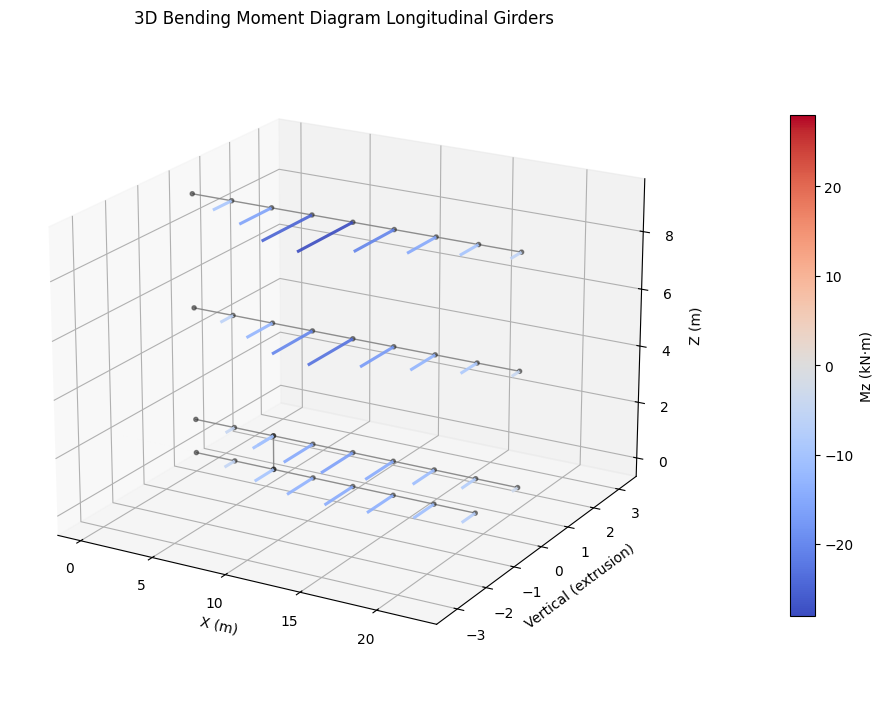

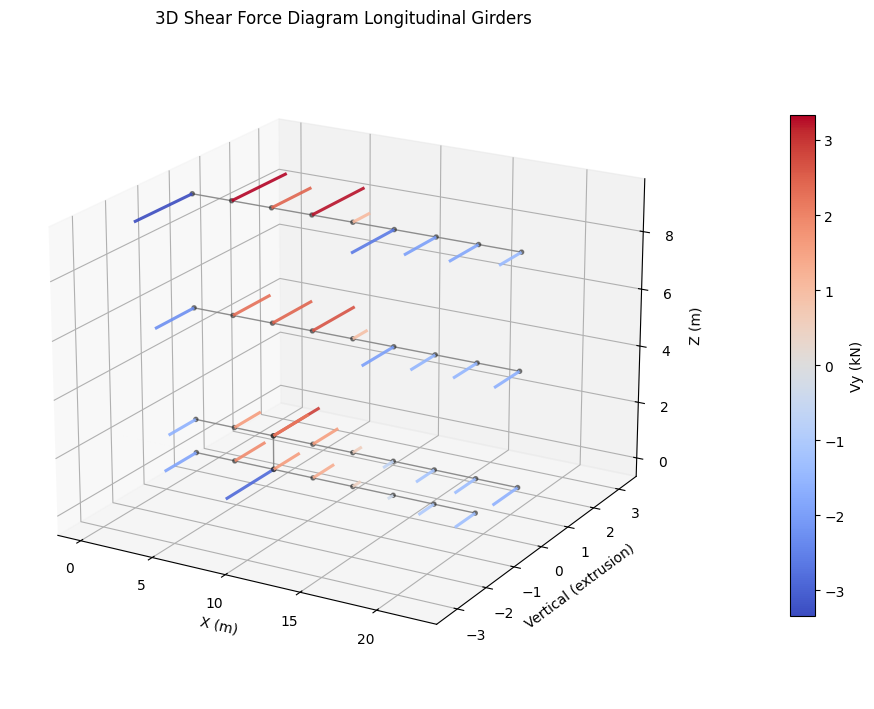

In [46]:

# 3) Helpers
def node_xyz (node_id):
	x, y, z = nodes [node_id]
	return float(x), float(y), float(z)

def chain_nodes_and_values (elem_ids, comp_i, comp_j):
    """Return node_ids (ordered), node_vals (N+1), chainage (m), and plan coords (x, z)."""
    Mi = F.sel(Element=elem_ids, Component=comp_i).to_numpy().astype (float)
    Mj = F.sel(Element=elem_ids, Component=comp_j).to_numpy().astype (float)
    node_ids = []
    node_vals = []
    for k, e in enumerate(elem_ids):
        ni, nj = members [e]
        if k == 0:
            node_ids = [ni, nj]
            node_vals = [Mi[0], Mj [0]]
        else:
            expected = node_ids [-1]
            if ni == expected:
                node_ids.append(nj)
                node_vals.append(Mj [k])
            elif nj == expected:
                # reversed: swap i/j values for this element
                node_ids.append(ni)
                node_vals.append(Mi [k])
            else:
                raise ValueError(f"Broken chain at element {e}: prev end {expected}, got {ni}-{nj}")
    # Plan coordinates and chainage
    xs, zs = [], []
    for nid in node_ids:
        x, y, z = node_xyz (nid) # Note: y is extracted but not used for plan coordinates
        xs.append(x); zs.append(z)
    xs = np.array(xs); zs = np.array(zs)

    seg_len = np.sqrt(np.diff (xs) **2 + np.diff (zs)**2)
    chain = np.concatenate([[0.0], np.cumsum(seg_len) ])
    return np.array(node_ids), np.array(node_vals), chain, xs, zs
def collect (which):
    """Gather per girder results and global vmax & spans."""
    if which == "BMD":
        ci, cj = name_Mz_i, name_Mz_j
    else:
        ci, cj = name_Vy_i, name_Vy_j
    per = {}
    all_vals, all_x, all_z = [], [], []
    for gname, elems in GIRDERS.items():
        nids, vals, chain, xs, zs = chain_nodes_and_values (elems, ci, cj)
        per [gname] = dict(nids=nids, vals=vals, chain=chain, xs=xs, zs=zs)
        all_vals.extend(vals); all_x.extend(xs); all_z.extend(zs)
    vmax = float(np.nanmax (np.abs (all_vals))) or 1.0
    span_x = (max (all_x) - min (all_x)) or 1.0
    span_z = (max (all_z) - min(all_z)) or 1.0
    plan_span = max(span_x, span_z)
    scale = (plan_span / 12.0) / vmax
    return per, vmax, plan_span, scale
def add_colorbar (ax, vmax, label):
    mappable = plt.cm.ScalarMappable (cmap=COLORMAP)
    mappable.set_clim(-vmax, vmax)
    cb = plt.colorbar (mappable, ax=ax, pad=0.1, shrink=0.75)
    cb.set_label(label)
def girder_stats (which, per):
    """Return a list of extrema rows for CSV."""
    rows = []
    for gname, d in per.items():
        vals = d["vals"]; chain = d["chain"]; nids = d["nids"]
        imax = int(np.argmax (vals)); imin = int(np.argmin (vals))
        rows.append(dict (kind=which, girder=gname, stat="max",
                     value=float(vals[imax]), node=int(nids[imax]), chainage=float(chain[imax])))
        rows.append(dict (kind=which, girder=gname, stat="min",
                     value=float (vals [imin]), node=int (nids [imin]), chainage=float (chain [imin])))
    return rows
def make_3d (which):
    per, vmax, plan_span, scale = collect (which)
    fig = plt.figure(figsize=(11.5, 7.2))
    ax = fig.add_subplot(111, projection="3d")
    ax.set_title(f"3D {'Bending Moment' if which=='BMD' else 'Shear Force'} Diagram Longitudinal Girders")
    ax.set_xlabel("X (m)"); ax.set_ylabel("Vertical (extrusion)"); ax.set_zlabel("Z (m)")

    cmap = plt.get_cmap(COLORMAP)

    for gname, d in per.items():
        xs, zs, vals = d["xs"], d["zs"], d["vals"]
        yo = np.zeros_like(xs)
        y1 = vals * scale

        # deck polyline
        ax.plot(xs, yo, zs, color=DECK_COLOR, lw=DECK_WIDTH, alpha=0.95)
        # build vertical segments for Line3DCollection (vectorized, faster)
        segs = np.stack( [np.column_stack ( [xs, yo, zs]),
                          np.column_stack ([xs, y1, zs])], axis=1) # shape (N, 2, 3)

        # colors mapped by value
        colors=cmap(0.5 + 0.5* (vals/vmax))
        coll = Line3DCollection (segs, colors=colors, linewidths=EXTRUSION_THICK, alpha=0.9)
        ax.add_collection(coll)
        # deck nodes (subtle)
        ax.scatter (xs, yo, zs, s=MARKER_SIZE, color="#222222", alpha=0.5)

        # Optional ribbon surface (slower)
        if RIBBON and len(xs) > 1:
            # build a thin quad strip between deck and extrusion along segments
            from mpl_toolkits.mplot3d.art3d import Poly3DCollection
            quads = []
            face_cols = []
            for k in range(len(xs) - 1):
                quad = [
                      [xs[k], 0.0, zs [k]],
                      [xs[k+1], 0.0, zs [k+1]],
                      [xs [k+1], y1 [k+1], zs [k+1]],
                      [xs[k], y1 [k], zs [k]],
                ]
                quads.append(quad)
                face_cols.append(cmap (0.5 + 0.5* (0.5*(vals [k] +vals [k+1]) / vmax)))
            surf = Poly3DCollection (quads, facecolors=face_cols, edgecolors='none', alpha=0.35)
            ax.add_collection3d(surf)

    add_colorbar (ax, vmax, "Mz (kN·m)" if which == "BMD" else "Vy (kN)")
    ax.set_ylim(-plan_span/6.0, +plan_span/6.0)
    ax.view_init(**VIEW)
    plt.tight_layout()
    out = f"Task2_{which}_3D.png"
    plt.savefig(out, dpi=260)
    print(f"Saved {out}")
    return per
def make_2d_plots (which, per):
    for gname, d in per.items():
        chain, vals = d["chain"], d["vals"]
        plt.figure()
        plt.plot(chain, vals, marker="o")
        plt.axhline(0, lw=1)
        plt.grid(True)
        plt.xlabel("Chainage along girder (m)")
        plt.ylabel("Mz (kN·m)" if which == "BMD" else "Vy (kN)")
        plt.title(f"{which} {gname}")
        plt.tight_layout()
        plt.savefig(f"Task2_{which}_{gname}_2D.png", dpi=220)
        plt.close()
# 4) Run and summarize
summary = []
if "BMD" in MAKE:
    per_bmd = make_3d("BMD")
    summary += girder_stats ("BMD", per_bmd)
    if MAKE_2D_PER_GIRDER:
        make_2d_plots("BMD", per_bmd)
if "SFD" in MAKE:
    per_sfd = make_3d("SFD")
    summary += girder_stats ("SFD", per_sfd)
    if MAKE_2D_PER_GIRDER:
        make_2d_plots("SFD", per_sfd)

In [45]:
#5) Export analysis table
import pandas as pd
if summary:
    df = pd.DataFrame(summary).sort_values(["kind", "girder", "stat"])
    df.to_csv("task2_summary.csv", index=False)
    print("Saved task2_summary.csv")

Saved task2_summary.csv
